In [50]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [51]:
#read csv
df = pd.read_csv('energydata_complete.csv')
df.head(2)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


## Question 1
The percent of the total variation of the dependent variable Y explained by the set of independent variables X is measured by

Ans: Coeffiecient of Determination

## Question 2
How do you define a Residual?

Ans: Y - Y^

## Question 3
The straight line graph of the equation Y = a + BX, the slope is horizontal if

Ans: b=0

## Question 4
Which of the one is true about Heteroskedasticity?

Ans:

## Question 5
Generally, which of the following method(s) is used for predicting continuous dependent variables?

1. Linear Regression

2. Logistic Regression

Ans: Linear Regression

## Question 6
From the following options below, which of these is/are true about “Ridge” or “Lasso” regression methods in case of feature selection?







Ans: Lasso regression uses subset selection of features

## Question 7
Which of the following sentences is/are true about outliers in Linear Regression:

Ans: Linear regression is sensitive to outliers

## Question 8
Which of the following metrics can be used for evaluating regression models?

1. R Squared

2. Adjusted R Squared

3. F Statistics

4. RMSE / MSE / MAE

Ans: 1, 2, 3 and 4

## Question 9
A best fit line relating X and Y has a R-Squared value of 0.75. How do I interpret this information?







Ans: 75% of the variance in Y is explained by X

## Question 10
Which of the following measures is optimal for comparing the goodness of the fit of competing regression models involving the same dependent variable?

Ans: R-squared

## Question 11
The Lasso can be interpreted as least-squares linear regression where:

Ans: Weights are regularized with the L1 norm

## Question 12
From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?

<AxesSubplot: xlabel='T2', ylabel='T6'>

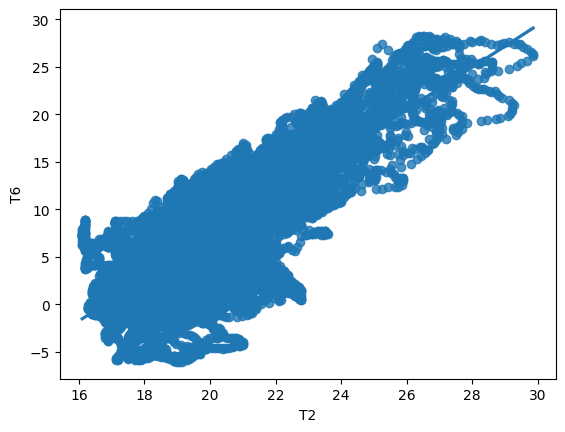

In [52]:
sns.regplot(data = df, x = 'T2', y = 'T6')

In [53]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
#define predictor and response variable
x, y = df[['T2','T6']]

#fit regression
model.fit(x, y)

ValueError: Expected 2D array, got scalar array instead:
array=T2.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Question 13
Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:

What is the Mean Absolute Error (in two decimal places)?

In [ ]:
#drop 'date' and 'lights' col

new_df = df.drop(columns = ['date', 'lights'])

#normalise dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

norm_df = pd.DataFrame(scaler.fit_transform(new_df),columns= new_df.columns)
norm_df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [ ]:
features_df = norm_df.drop(columns = ['Appliances'])
features_df.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [ ]:
target_var = norm_df['Appliances']
target_var.head()

0    0.046729
1    0.046729
2    0.037383
3    0.037383
4    0.046729
Name: Appliances, dtype: float64

In [ ]:
# Split dataset into training and testing dataset.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_df, target_var, test_size = 0.3, random_state= 1)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train, y_train)

#obtain predictions
predicted_values = linear_model.predict(x_test)

In [ ]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
mae.round(2)

0.05

## Question 14
What is the RSS (in two decimal places)?







In [ ]:

from sklearn.metrics import mean_squared_error

rss= np.sum(np.square(y_test, predicted_values))
round(rss,2)

NameError: name 'y_test' is not defined

## Question 15
What is the RMSE (in three decimal places)?

In [ ]:

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse,3)

0.088

## Question 16
What is the Coefficient of Determination (in two decimal places)?

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predicted_values)
r2.round(2)

0.16

## Question 17
Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [ ]:
#Ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [ ]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
    #returns the weight of every feature
    
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [ ]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.458176,-0.412703,-0.000000
1,T_out,-0.330375,-0.269159,0.000000
2,T2,-0.249801,-0.214797,0.000084
3,T9,-0.204718,-0.203381,-0.000000
4,RH_8,-0.156534,-0.155889,-0.000000
5,RH_out,-0.076223,-0.052736,-0.047062
6,RH_7,-0.047614,-0.048777,-0.000000
7,RH_9,-0.036034,-0.037753,-0.000000
8,rv1,-0.000350,-0.000354,-0.000000
9,rv2,-0.000350,-0.000354,-0.000000


## Question 18

Train a ridge regression model with an alpha value of 0.4. Is there any change to the RMSE when evaluated on the test set?

Ans: No

## Question 19
Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

Ans: 4 
As seen in Question 17

## Question 20

What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse,3)

0.088